In [11]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [17]:
z = pd.DataFrame({'news': ["Alia Bhatt, Aditya Roy Kapur and Sanjay Dutt starrer 'Sadak 2' trailer has become the third most disliked YouTube video in the world, amid nepotism debate. So far, it has received 10 million dislikes and is behind Justin Bieber's song 'Baby' (11 million dislikes) and YouTube Rewind 2018 (18 million dislikes). The trailer of the film was released on Wednesday.","Following MS Dhoni's retirement from international cricket, actor Ranveer Singh took to Instagram and shared throwback pictures of himself with Dhoni and revealed he took an ad job when he was around 22 years old only because it featured Dhoni.he wrote."] })
z

,news
0,"Alia Bhatt, Aditya Roy Kapur and Sanjay Dutt s..."
1,Following MS Dhoni's retirement from internati...


In [18]:
def pre_process(text):
    text = text.lower()
    text = re.sub('&lt;/?.*?&gt', '&lt;&gt', text)
    text = re.sub("(\\d|\\W)+", " ", text)
    return text

In [19]:
z['news'] = z['news'].apply(lambda x: pre_process(x))

In [21]:
docs = z['news'].tolist()
docs

['alia bhatt aditya roy kapur and sanjay dutt starrer sadak trailer has become the third most disliked youtube video in the world amid nepotism debate so far it has received million dislikes and is behind justin bieber s song baby million dislikes and youtube rewind million dislikes the trailer of the film was released on wednesday ',
 'following ms dhoni s retirement from international cricket actor ranveer singh took to instagram and shared throwback pictures of himself with dhoni and revealed he took an ad job when he was around years old only because it featured dhoni he wrote ']

In [22]:
#preprocessed_text = pre_process(text)
cv = CountVectorizer(max_df=0.85, stop_words=stopwords, max_features=10000)
word_count_vector = cv.fit_transform(docs)

In [23]:
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [24]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [25]:
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    sorted_items = sorted_items[:topn]
    score_vals, feature_vals = [], []
    for idx, score in sorted_items:
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
        
    results = {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]] = score_vals[idx]
    return results

In [27]:
feature_names = cv.get_feature_names()
doc = docs[0]
tf_idf_vector = tfidf_transformer.fit_transform(cv.transform([doc]))
sorted_items = sort_coo(tf_idf_vector.tocoo())
keywords = extract_topn_from_vector(feature_names, sorted_items)
keywords

{'million': 0.408,
 'dislikes': 0.408,
 'youtube': 0.272,
 'trailer': 0.272,
 'world': 0.136,
 'wednesday': 0.136,
 'video': 0.136,
 'third': 0.136,
 'starrer': 0.136,
 'song': 0.136}

In [28]:
! pip install vaderSentiment

     |████████████████████████████████| 125 kB 317 kB/s eta 0:00:01


In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [32]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print(score)
    print("{}".format(sentence, str(score)))

In [36]:
sentiment_analyzer_scores('He is a man')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
He is a man


In [39]:
!pip install waterfallcharts

  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3411 sha256=a1cb56fe4e26019e9875d3e35f6c832796759e05b75042b330cbe975a21938f0
  Stored in directory: /Users/deep.gandhi/Library/Caches/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts


In [40]:
import waterfall_chart

In [48]:
my_plot.savefig('deep.png')

<Figure size 432x288 with 0 Axes>

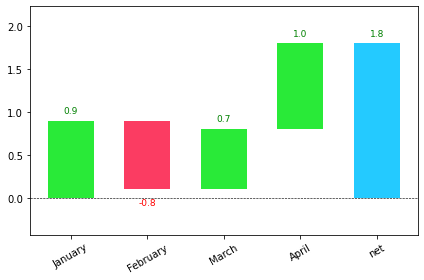

In [54]:
waterfall_chart.plot(a,b).savefig('deep.png')

In [60]:
a[::-1]

['April', 'March', 'February', 'January']

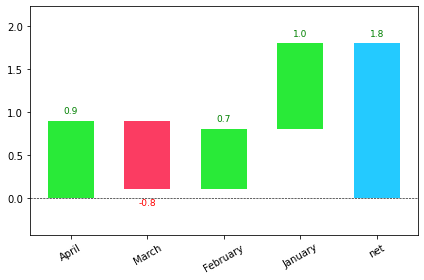

In [61]:
waterfall_chart.plot(a[::-1],b).savefig('deep.png')

In [62]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

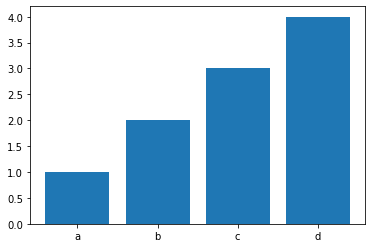

In [66]:
a = ['a','b','c','d']
b = [1,2,3,4]
plt.bar(a,b)

In [177]:
import requests

In [178]:
data1 = {
    
    "months": "['Jan', 'Feb']",
    "values": "[0.8, 0.7]",
    "skill": "Smart"
}


data ={
    "skills": str(['Design', 'Data']),
    "comments": "[['Hi, I am Deep Gandhi', 'Hello whats up', 'Deep Gandhi Rocks'], ['Data Science Rocks', 'Data Science', 'Very Interesting subject is it']]",
    "points": "{'Design' :1,'Data': 1}"
}

In [179]:
response = requests.post('http://127.0.0.1:5000/class/perform', data=data1)

In [181]:
response.json()

{'Path': '/Users/deep.gandhi/sef/Smart2.png'}

In [198]:
data3 ={
    "values": "[[1,2], [3,4]]",
    "skills" : "['Design', 'Data']",
    "months": "['Jan', 'Feb']"
}

In [201]:
response = requests.post('http://127.0.0.1:5000/student/self', data=data3)
response

<Response [200]>

In [202]:
response.json()

{'path': 'image.png'}